In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r'data.csv')

In [3]:
#To describe the merged dataframe df
df.describe()

,maternalage,ageatfirstmarriage,ageatfirstpregnancy,numberofancvisit,gravidity,parity,birthweight,apgarscoreatfiveminutes,hemoglobinlevelonadmissionfordel,numberofpuscellsinurineonadmissi,Residence_COunty,Ethnicity12,AgeFstPregnancy
count,352.000000,292.000000,352.000000,352.000000,352.000000,352.000000,342.000000,345.000000,337.000000,66.000000,352.0,352.000000,352.000000
mean,26.465909,21.777397,21.559659,3.849432,2.053977,1.840909,3036.871345,8.307246,11.905341,10.212121,1.0,2.690341,1.681818
std,5.493221,3.613896,3.551312,1.501205,1.122135,1.028221,597.889255,2.422899,1.473587,6.889267,0.0,1.459078,0.472502
min,17.000000,14.000000,14.000000,0.000000,1.000000,0.000000,960.000000,0.000000,6.400000,2.000000,1.0,1.000000,1.000000
25%,22.000000,19.000000,19.000000,3.000000,1.000000,1.000000,2800.000000,9.000000,11.000000,4.250000,1.0,1.000000,1.000000
50%,25.000000,21.000000,21.000000,4.000000,2.000000,2.000000,3100.000000,9.000000,12.000000,9.000000,1.0,2.500000,2.000000
75%,30.000000,24.000000,24.000000,5.000000,3.000000,2.000000,3400.000000,9.000000,12.800000,12.000000,1.0,4.000000,2.000000
max,42.000000,35.000000,38.000000,12.000000,6.000000,6.000000,4500.000000,10.000000,15.800000,30.000000,1.0,5.000000,3.000000


In [4]:
df.dtypes

id                   object
maternalage           int64
maternaleducation    object
maritalstatus        object
occupation           object
                      ...  
TimeAlcoholuse       object
SpecificTreat1       object
TretaMentPurpose1    object
Ethnicity12           int64
AgeFstPregnancy       int64
Length: 88, dtype: object

In [5]:
#Check for missing values
df.isna().sum()

id                     0
maternalage            0
maternaleducation      0
maritalstatus          0
occupation             0
                    ... 
TimeAlcoholuse       327
SpecificTreat1       332
TretaMentPurpose1    332
Ethnicity12            0
AgeFstPregnancy        0
Length: 88, dtype: int64

In [6]:
df2 = df[['maternalage','maternaleducation', 'ageatfirstpregnancy','parity','diabetespersonalhistory','diabetesfamilyhistory','hypertensionpersonalhistory','hypertensionfamilyhistory','numberofancvisit','timetrimesteroffirstancvisit','multiplicityofpregnancy','gravidity','tobaccouse','alcoholuse','AgeFstPregnancy','countyofresidence','Specific_AreaResid','Disease']]

In [7]:
# Replace all occurrences of 'Case (Preeclampsia and/Eclampsia)' with 1 in the 'disease' column
df2['Disease'] = df2['Disease'].replace('Case (Preeclampsia and/Eclampsia)', 1)

# Replace all occurrences of 'Control ( Without Preeclampsia and/Eclampsia)' with 0 in the 'disease' column
df2['Disease'] = df2['Disease'].replace('Control ( Without Preeclampsia and/Eclampsia)', 0)

<ipython-input-7-016cc50ba029>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Disease'] = df2['Disease'].replace('Case (Preeclampsia and/Eclampsia)', 1)
<ipython-input-7-016cc50ba029>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Disease'] = df2['Disease'].replace('Control ( Without Preeclampsia and/Eclampsia)', 0)


In [8]:
df2

,maternalage,maternaleducation,ageatfirstpregnancy,parity,diabetespersonalhistory,diabetesfamilyhistory,hypertensionpersonalhistory,hypertensionfamilyhistory,numberofancvisit,timetrimesteroffirstancvisit,multiplicityofpregnancy,gravidity,tobaccouse,alcoholuse,AgeFstPregnancy,countyofresidence,Specific_AreaResid,Disease
0,24,Tertiary education,24,1,No,No,No,No,4,First trimester,Singleton,1,No,No,2,Nairobi,Informal settlement,1
1,37,Tertiary education,26,4,No,No,No,Yes,3,First trimester,Singleton,4,No,No,2,Nairobi,Informal settlement,1
2,27,Tertiary education,26,1,No,No,No,No,3,Second trimester,Singleton,1,Yes,Yes,2,Nairobi,Urban/estate,1
3,30,Tertiary education,27,2,No,Yes,No,No,3,First trimester,Singleton,2,No,No,2,Nairobi,Informal settlement,0
4,29,Secondary education,18,3,No,No,No,Yes,4,First trimester,Singleton,3,No,No,1,Nairobi,Informal settlement,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,32,Tertiary education,29,2,No,No,No,No,3,Second trimester,Singleton,2,No,No,2,Nairobi,Informal settlement,1
348,27,Secondary education,25,2,No,Yes,No,Yes,3,Second trimester,Singleton,2,No,No,2,Nairobi,Informal settlement,0
349,27,Primary education,18,2,No,No,No,No,5,Second trimester,Singleton,2,No,No,1,Nairobi,Informal settlement,0
350,26,Secondary education,23,2,No,No,No,No,4,Second trimester,Singleton,2,No,No,2,Kajiado,Informal settlement,0


In [9]:
df2['diabetespersonalhistory'] = df2['diabetespersonalhistory'].replace('Yes',1)
df2['diabetespersonalhistory'] = df2['diabetespersonalhistory'].replace('No',0)
df2['diabetesfamilyhistory'] = df2['diabetesfamilyhistory'].replace('Yes',1)
df2['diabetesfamilyhistory'] = df2['diabetesfamilyhistory'].replace('No',0)
df2['hypertensionpersonalhistory'] = df2['hypertensionpersonalhistory'].replace('Yes',1)
df2['hypertensionpersonalhistory'] = df2['hypertensionpersonalhistory'].replace('No',0)
df2['hypertensionfamilyhistory'] = df2['hypertensionfamilyhistory'].replace('Yes',1)
df2['hypertensionfamilyhistory'] = df2['hypertensionfamilyhistory'].replace('No',0)
df2['timetrimesteroffirstancvisit']= df2['timetrimesteroffirstancvisit'].replace('First trimester',1)
df2['timetrimesteroffirstancvisit']= df2['timetrimesteroffirstancvisit'].replace('Second trimester ',2)
df2['timetrimesteroffirstancvisit']= df2['timetrimesteroffirstancvisit'].replace('Third trimester',3)
df2['timetrimesteroffirstancvisit']= df2['timetrimesteroffirstancvisit'].replace('None',0)
df2['multiplicityofpregnancy']= df2['multiplicityofpregnancy'].replace('Singleton',1)
df2['multiplicityofpregnancy']= df2['multiplicityofpregnancy'].replace('Twin',2)
df2['tobaccouse'] = df2['tobaccouse'].replace('Yes',1)
df2['tobaccouse'] = df2['tobaccouse'].replace('No',0)
df2['alcoholuse'] = df2['alcoholuse'].replace('Yes',1)
df2['alcoholuse'] = df2['alcoholuse'].replace('No',0)
df2['Specific_AreaResid'] = df2['Specific_AreaResid'].replace('Rural',0)
df2['Specific_AreaResid'] = df2['Specific_AreaResid'].replace('Informal settlement',1)
df2['Specific_AreaResid'] = df2['Specific_AreaResid'].replace('Urban/estate',2)

<ipython-input-9-e3dae645371d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['diabetespersonalhistory'] = df2['diabetespersonalhistory'].replace('Yes',1)
<ipython-input-9-e3dae645371d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['diabetespersonalhistory'] = df2['diabetespersonalhistory'].replace('No',0)
<ipython-input-9-e3dae645371d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [10]:
df2

,maternalage,maternaleducation,ageatfirstpregnancy,parity,diabetespersonalhistory,diabetesfamilyhistory,hypertensionpersonalhistory,hypertensionfamilyhistory,numberofancvisit,timetrimesteroffirstancvisit,multiplicityofpregnancy,gravidity,tobaccouse,alcoholuse,AgeFstPregnancy,countyofresidence,Specific_AreaResid,Disease
0,24,Tertiary education,24,1,0,0,0,0,4,1,1,1,0,0,2,Nairobi,1,1
1,37,Tertiary education,26,4,0,0,0,1,3,1,1,4,0,0,2,Nairobi,1,1
2,27,Tertiary education,26,1,0,0,0,0,3,2,1,1,1,1,2,Nairobi,2,1
3,30,Tertiary education,27,2,0,1,0,0,3,1,1,2,0,0,2,Nairobi,1,0
4,29,Secondary education,18,3,0,0,0,1,4,1,1,3,0,0,1,Nairobi,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,32,Tertiary education,29,2,0,0,0,0,3,2,1,2,0,0,2,Nairobi,1,1
348,27,Secondary education,25,2,0,1,0,1,3,2,1,2,0,0,2,Nairobi,1,0
349,27,Primary education,18,2,0,0,0,0,5,2,1,2,0,0,1,Nairobi,1,0
350,26,Secondary education,23,2,0,0,0,0,4,2,1,2,0,0,2,Kajiado,1,0


In [11]:
df2 = df2.drop('countyofresidence',axis=1)
df2 = df2.drop('maternaleducation',axis=1)
df2 = df2.drop('diabetespersonalhistory',axis=1)

In [12]:
df2

,maternalage,ageatfirstpregnancy,parity,diabetesfamilyhistory,hypertensionpersonalhistory,hypertensionfamilyhistory,numberofancvisit,timetrimesteroffirstancvisit,multiplicityofpregnancy,gravidity,tobaccouse,alcoholuse,AgeFstPregnancy,Specific_AreaResid,Disease
0,24,24,1,0,0,0,4,1,1,1,0,0,2,1,1
1,37,26,4,0,0,1,3,1,1,4,0,0,2,1,1
2,27,26,1,0,0,0,3,2,1,1,1,1,2,2,1
3,30,27,2,1,0,0,3,1,1,2,0,0,2,1,0
4,29,18,3,0,0,1,4,1,1,3,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,32,29,2,0,0,0,3,2,1,2,0,0,2,1,1
348,27,25,2,1,0,1,3,2,1,2,0,0,2,1,0
349,27,18,2,0,0,0,5,2,1,2,0,0,1,1,0
350,26,23,2,0,0,0,4,2,1,2,0,0,2,1,0


In [13]:
df2.isna().sum()

maternalage                     0
ageatfirstpregnancy             0
parity                          0
diabetesfamilyhistory           0
hypertensionpersonalhistory     0
hypertensionfamilyhistory       0
numberofancvisit                0
timetrimesteroffirstancvisit    0
multiplicityofpregnancy         0
gravidity                       0
tobaccouse                      0
alcoholuse                      0
AgeFstPregnancy                 0
Specific_AreaResid              0
Disease                         0
dtype: int64

In [14]:
#check for duplicate values
df2.duplicated().sum()

13

In [15]:
#Remove duplicates
df2.drop_duplicates(inplace=True)
df2.shape

(339, 15)

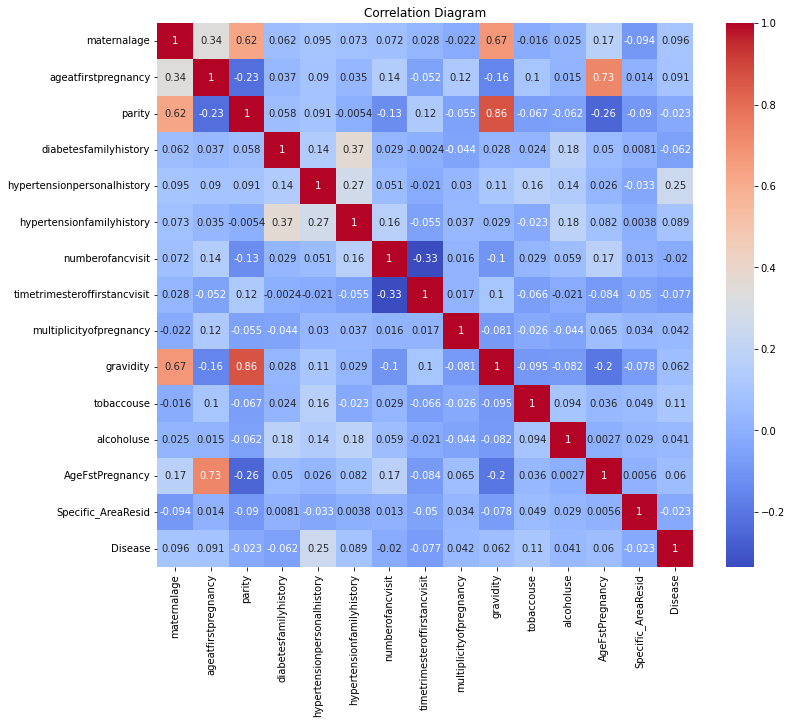

In [16]:
corr_matrix = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Diagram')
plt.show()

In [17]:
df2.to_csv(r'C:\Users\folop\OneDrive\Desktop\data.csv', index=False)

In [18]:
# Separate the target variable from the features
X = df2.drop('Disease', axis=1)
y = df2['Disease']

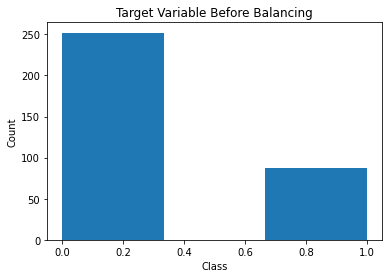

In [19]:
# plot the target variable before balancing
plt.hist(y, bins=3)
plt.title('Target Variable Before Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

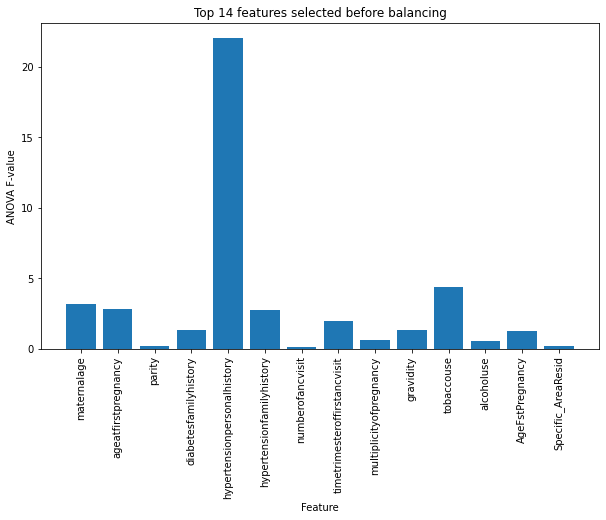

In [20]:
k = 14
selector = SelectKBest(f_classif, k=k)
selector.fit(X, y)
X_topk = selector.transform(X)

# Plot selected features before balancing
plt.figure(figsize=(10,6))
plt.bar(range(len(selector.scores_)), selector.scores_)
plt.xticks(range(len(selector.scores_)), X.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('ANOVA F-value')
plt.title('Top {} features selected before balancing'.format(k))
plt.show()

In [21]:
scaler=StandardScaler()
x = scaler.fit_transform(df2)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a logistic regression model using the training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Evaluate the model using the testing data
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.7352941176470589


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       71     8
1       19     4


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        79
           1       0.33      0.17      0.23        23

    accuracy                           0.74       102
   macro avg       0.56      0.54      0.53       102
weighted avg       0.69      0.74      0.70       102



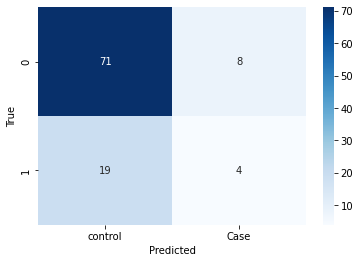

In [25]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC-ROC score: 0.5173362685745735


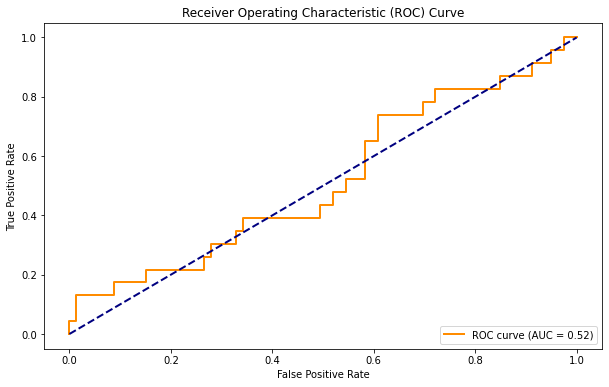

In [26]:
# Predict probabilities for the testing set
y_prob = lr.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Build a logistic regression model using the training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Evaluate the model using the testing data
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.7529411764705882


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       60     5
1       16     4


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        65
           1       0.44      0.20      0.28        20

    accuracy                           0.75        85
   macro avg       0.62      0.56      0.56        85
weighted avg       0.71      0.75      0.72        85



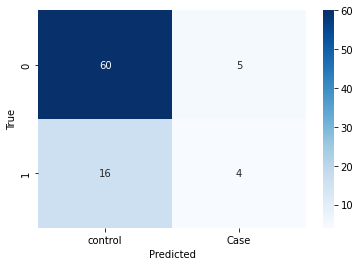

In [30]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC-ROC score: 0.5361538461538461


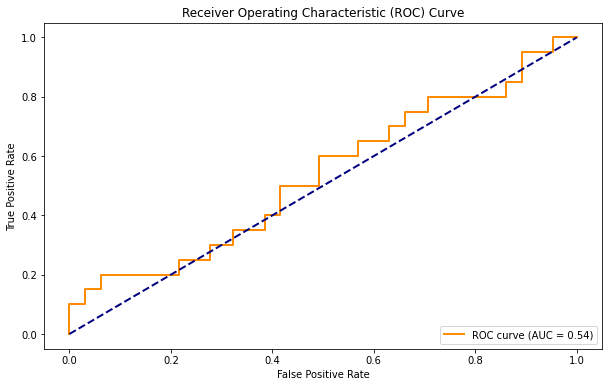

In [31]:
# Predict probabilities for the testing set
y_prob = lr.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Build a logistic regression model using the training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Evaluate the model using the testing data
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.7647058823529411


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       49     3
1       13     3


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        52
           1       0.50      0.19      0.27        16

    accuracy                           0.76        68
   macro avg       0.65      0.56      0.57        68
weighted avg       0.72      0.76      0.72        68



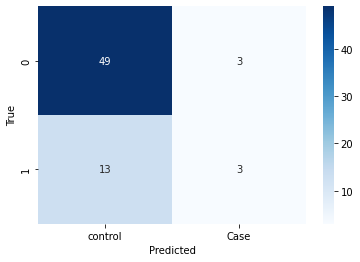

In [35]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC-ROC score: 0.6201923076923077


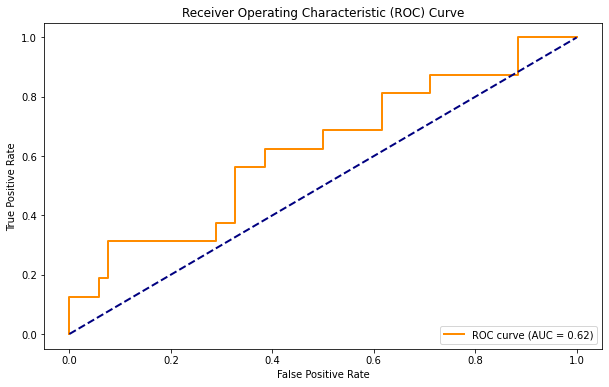

In [36]:
# Predict probabilities for the testing set
y_prob = lr.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
from imblearn.combine import SMOTEENN
from collections import Counter
counter = Counter(y_train)
print('Before',counter)
# assuming X_train and y_train are your input features and labels, respectively
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
counter = Counter(y_resampled)
print('After',counter)

Before Counter({0: 200, 1: 71})
After Counter({1: 104, 0: 64})


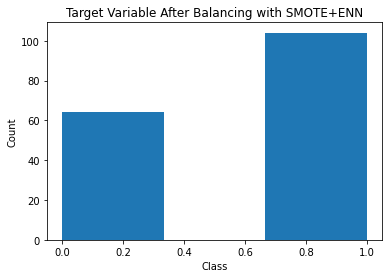

In [38]:
plt.hist(y_resampled, bins=3)
plt.title('Target Variable After Balancing with SMOTE+ENN')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


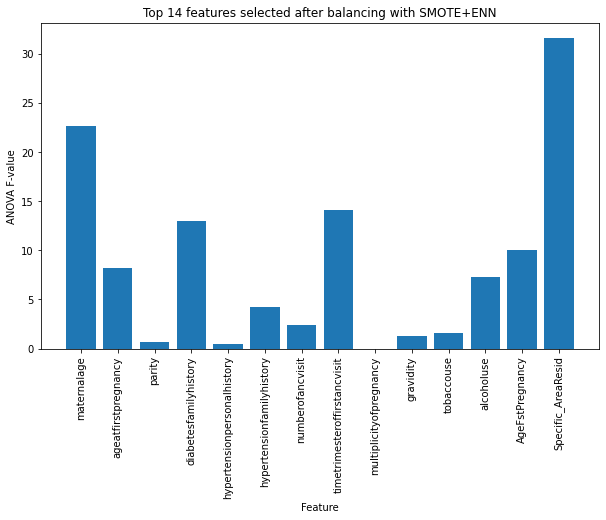

In [39]:
selector_balanced = SelectKBest(f_classif, k=k)
selector_balanced.fit(X_resampled, y_resampled)
X_balanced_topk = selector_balanced.transform(X_resampled)

# Plot selected features after balancing
plt.figure(figsize=(10,6))
plt.bar(range(len(selector_balanced.scores_)), selector_balanced.scores_)
plt.xticks(range(len(selector_balanced.scores_)), X.columns[selector.get_support()], rotation=90)
plt.xlabel('Feature')
plt.ylabel('ANOVA F-value')
plt.title('Top {} features selected after balancing with SMOTE+ENN'.format(k))
plt.show()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)

# Build a logistic regression model using the training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Evaluate the model using the testing data
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.8431372549019608


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       16     4
1        4    27


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.87      0.87      0.87        31

    accuracy                           0.84        51
   macro avg       0.84      0.84      0.84        51
weighted avg       0.84      0.84      0.84        51



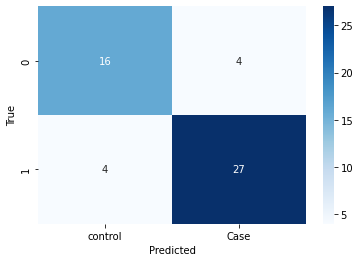

In [43]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC-ROC score: 0.8612903225806452


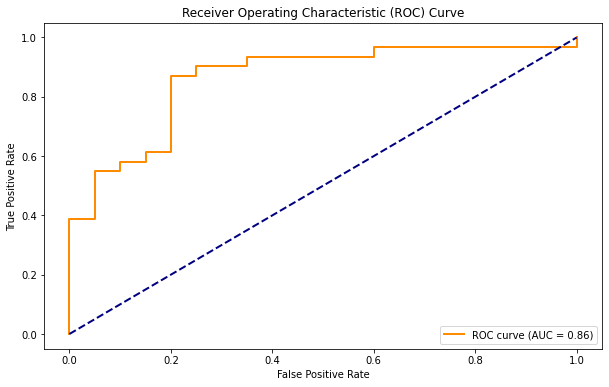

In [44]:
# Predict probabilities for the testing set
y_prob = lr.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Build a logistic regression model using the training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Evaluate the model using the testing data
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.8571428571428571


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       14     3
1        3    22


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.88      0.88      0.88        25

    accuracy                           0.86        42
   macro avg       0.85      0.85      0.85        42
weighted avg       0.86      0.86      0.86        42



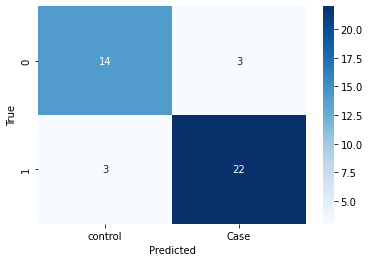

In [48]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC-ROC score: 0.8776470588235293


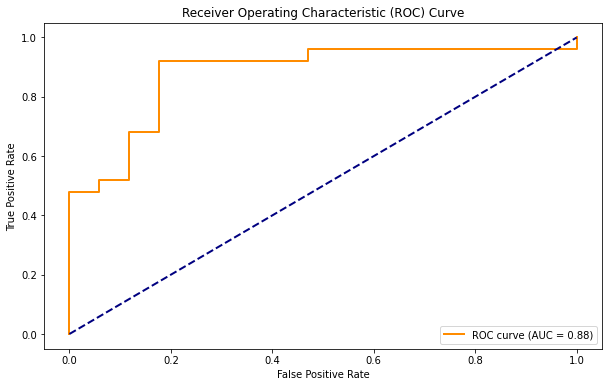

In [49]:
# Predict probabilities for the testing set
y_prob = lr.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

# Build a logistic regression model using the training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Evaluate the model using the testing data
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.8235294117647058


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'], 
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0       12     4
1        2    16


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.80      0.89      0.84        18

    accuracy                           0.82        34
   macro avg       0.83      0.82      0.82        34
weighted avg       0.83      0.82      0.82        34



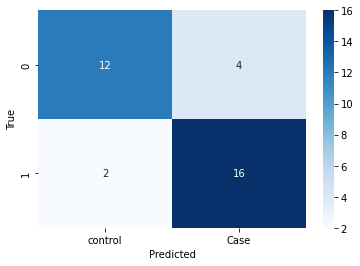

In [53]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC-ROC score: 0.861111111111111


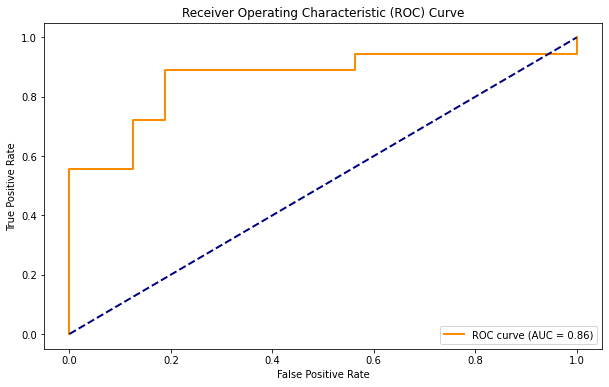

In [54]:
# Predict probabilities for the testing set
y_prob = lr.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()